In [22]:
!pip install pdfminer

  Created wheel for pdfminer: filename=pdfminer-20191125-py3-none-any.whl size=6140125 sha256=98a882a87ede75171dc60c12a1cfb0838684039fab73cb6723a53f6f05b13d25
  Stored in directory: c:\users\abhishek\appdata\local\pip\cache\wheels\1c\28\7d\f390b82bb0307deb63ff27a1474fd308ec68ee028cb9ab6283
Successfully built pdfminer


In [42]:
!pip install pdfminer.six

In [1]:
from io import StringIO

from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser


In [2]:
def readTextFromPDF(file_name):
    output_string = StringIO()
    with open(file_name, 'rb') as in_file:
        parser = PDFParser(in_file)
        doc = PDFDocument(parser)
        rsrcmgr = PDFResourceManager()
        device = TextConverter(rsrcmgr, output_string, laparams=LAParams())
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        for page in PDFPage.create_pages(doc):
            interpreter.process_page(page)

    return(output_string.getvalue())   

### Get all the states and Union territories

In [3]:
states = []
nextState = False
for line in readTextFromPDF('PIB1689778.pdf').split('\n'):
    if nextState:
        states.append(line.strip())
    elif 'State' in line:
        nextState = True
        print("/".join(line.split()[2:5]))

#print(f"{states[:19]} \n {states[49:56]} \n {states}")

states = states[:19] + states[49:56]
print(states)
len(states)


['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Manipur', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand', 'West Bengal', 'All India']


26

In [4]:
states = states + ['Goa', 'Gujarat', 'Maharashtra', 'Meghalaya', 'Rajasthan', 'Sikkim', 'Uttar Pradesh', 'Chandigarh','Andaman and Nicobar Islands','Dadra & Nagar Haveli','Daman & Diu','Ladakh', 'D a d r a   &   N a g a r','A & N Islands']

In [8]:
states.append('Dadra & Nagar Haveli')

In [9]:
states.append('Miscellaneous')

In [10]:
len(states)

42

In [13]:
states.remove('All India')

In [14]:
states

['Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chhattisgarh',
 'Delhi',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Lakshadweep',
 'Madhya Pradesh',
 'Manipur',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttarakhand',
 'West Bengal',
 'Goa',
 'Gujarat',
 'Maharashtra',
 'Meghalaya',
 'Rajasthan',
 'Sikkim',
 'Uttar Pradesh',
 'Chandigarh',
 'Andaman and Nicobar Islands',
 'Dadra & Nagar Haveli',
 'Daman & Diu',
 'Ladakh',
 'D a d r a   &   N a g a r',
 'A & N Islands',
 'Dadra & Nagar Haveli',
 'Miscellaneous']

## TODO

### Will create a dataframe with rows as states and columns as date

### Create another table with count of side effects from vaccine each day

In [6]:
import re

regex = r"PIB.*pdf"

In [7]:
#Get the pdf's in the present directory

from os import listdir
from os.path import isfile, join
vaccFiles = [f for f in listdir("./") if isfile(f) and re.search(regex,f) != None]
vaccFiles

['PIB1689167.pdf',
 'PIB1689778.pdf',
 'PIB1690120.pdf',
 'PIB1690536.pdf',
 'PIB1690997.pdf',
 'PIB1691304.pdf',
 'PIB1691661.pdf']

In [93]:
data = {}

#### Parsing PIB1689167.pdf as it is structurally different

In [80]:
for file in vaccFiles:
    if file == "PIB1689167.pdf":
        state = []
        Benef = []
        print(f'Reading File: {file}')
        pdfText = readTextFromPDF(file)
        stateCount = 0
        stateFound = False
        for line in pdfText.split('\n'):
            if 'Posted On' in line:
                print("/".join(line.split()[2:5]))
            if stateCount > 0 and line.strip() not in states:
                try:
                    int("".join(line.strip().split(",")))
                    stateCount -=1
                    Benef.append(int("".join(line.strip().split(","))))
                except:
                    #print(f"Got String which can't convert to int:{line.strip()}")
                    continue
            elif line.strip() in states and line.strip() not in state:
                stateFound = True
                stateCount +=2
                state.append(line.strip())
        print(f"State: {state} Length: {len(state)} Benef:{Benef[:]} Len: {len(Benef)}")
    else:
        print(f"{file} need to be treated differently")

Reading File: PIB1689167.pdf
16/JAN/2021
State: ['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'D a d r a   &   N a g a r', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'] Length: 37 Benef:['2', '332', '225', '18412', '9', '65', '301', '4', '97', '1', '1', '81', '7', '161', '77', '28', '41', '48', '242', '133', '2', '1', '150', '285', '10', '10', '5', '9', '161', '8', '59', '167', '2', '161', '140', '18', '317', '34', '183', '3352', '829', '3528', '18169', '265', '5592', '80', '43', '4319', '426', '10787', '5589', '1517', '2044', '3096', '13594', '8062', '79', '21', '9219', '18328', '585', '509', '314', '561

In [82]:
Benef_16th_JAN_21

['225',
 '18412',
 '829',
 '3528',
 '18169',
 '265',
 '5592',
 '80',
 '43',
 '4319',
 '426',
 '10787',
 '5589',
 '1517',
 '2044',
 '3096',
 '13594',
 '8062',
 '79',
 '21',
 '9219',
 '18328',
 '585',
 '509',
 '314',
 '561',
 '13746',
 '274',
 '1319',
 '9279',
 '120',
 '2945',
 '3653',
 '355',
 '21291',
 '2276',
 '9730']

In [83]:
State_16th_JAN_21

['A & N Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'D a d r a   &   N a g a r',
 'Daman & Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [94]:
data['States/UN'] = []
data['16th/JAN/21'] = []
for i,state in enumerate(states):
    data['States/UN'].append(state)
    data['16th/JAN/21'].append(0)
    if state in State_16th_JAN_21:
        data['16th/JAN/21'][i] = int(Benef_16th_JAN_21[State_16th_JAN_21.index(state)])
print(data)


{'States/UN': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Manipur', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand', 'West Bengal', 'Goa', 'Gujarat', 'Maharashtra', 'Meghalaya', 'Rajasthan', 'Sikkim', 'Uttar Pradesh', 'Chandigarh', 'Andaman and Nicobar Islands', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Ladakh', 'D a d r a   &   N a g a r', 'A & N Islands', 'Dadra & Nagar Haveli', 'Miscellaneous'], '16th/JAN/21': [18412, 829, 3528, 18169, 5592, 4319, 5589, 1517, 2044, 3096, 13594, 8062, 21, 9219, 585, 314, 561, 13746, 274, 1319, 2945, 3653, 355, 2276, 9730, 426, 10787, 18328, 509, 9279, 120, 21291, 265, 0, 0, 43, 79, 80, 225, 0, 0]}


In [95]:
file1 = open("Day2_Vaccine_Drive.txt","r+") 
pdfText = file1.read()
state = []
Benef = []
stateCount = 0
stateFound = False
for line in pdfText.split('\n'):
    if 'Posted On' in line:
        date = "/".join(line.split()[2:5])
        print(date)
    if stateCount > 0 and line.strip() not in states:
        try:
            int("".join(line.strip().split(",")))
            stateCount -=1
            Benef.append(int("".join(line.strip().split(","))))
        except:
            #print(f"Got String which can't convert to int:{line.strip()}")
            continue
    elif line.strip() in states and line.strip() not in state:
        stateFound = True
        stateCount +=1
        state.append(line.strip())
data['States/UN'] = []
data[date] = []
for i,s in enumerate(states):
    data['States/UN'].append(s)
    data[date].append(0)
    if s in state:
        data[date][i] = Benef[state.index(s)]
print(data)
#print(f"State: {state} Length: {len(state)} Benef:{Benef[:]} Len: {len(Benef)}")

17/JAN/2021
{'States/UN': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Manipur', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand', 'West Bengal', 'Goa', 'Gujarat', 'Maharashtra', 'Meghalaya', 'Rajasthan', 'Sikkim', 'Uttar Pradesh', 'Chandigarh', 'Andaman and Nicobar Islands', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Ladakh', 'D a d r a   &   N a g a r', 'A & N Islands', 'Dadra & Nagar Haveli', 'Miscellaneous'], '16th/JAN/21': [18412, 829, 3528, 18169, 5592, 4319, 5589, 1517, 2044, 3096, 13594, 8062, 21, 9219, 585, 314, 561, 13746, 274, 1319, 2945, 3653, 355, 2276, 9730, 426, 10787, 18328, 509, 9279, 120, 21291, 265, 0, 0, 43, 79, 80, 225, 0, 0], '17/JAN/2021': [308, 14, 0, 0, 0, 0, 0, 0, 0, 0, 64, 1, 0, 0, 1, 0, 0, 0, 0, 0, 165, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Parsed all pdf file but not PIB1689167.pdf as it is structurally different

In [96]:
for file in vaccFiles:
    if file != "PIB1689167.pdf":
        state = []
        Benef = []
        print(f'Reading File: {file}')
        pdfText = readTextFromPDF(file)
        stateCount = 0
        stateFound = False
        for line in pdfText.split('\n'):
            if 'Posted On' in line:
                date = "/".join(line.split()[2:5])
                print(date)
            if stateCount > 0 and line.strip() not in states:
                try:
                    int("".join(line.strip().split(",")))
                    stateCount -=1
                    Benef.append(int("".join(line.strip().split(","))))
                except:
                    #print(f"Got String which can't convert to int:{line.strip()}")
                    continue
            elif line.strip() in states and line.strip() not in state:
                stateFound = True
                stateCount +=1
                state.append(line.strip())
        data['States/UN'] = []
        data[date] = []
        for i,s in enumerate(states):
            data['States/UN'].append(s)
            data[date].append(0)
            if s in state:
                data[date][i] = Benef[state.index(s)]
        print(data)
    else:
        print("PIB1689167.pdf need to be treated differently")

PIB1689167.pdf need to be treated differently
Reading File: PIB1689778.pdf
18/JAN/2021
{'States/UN': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Manipur', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand', 'West Bengal', 'Goa', 'Gujarat', 'Maharashtra', 'Meghalaya', 'Rajasthan', 'Sikkim', 'Uttar Pradesh', 'Chandigarh', 'Andaman and Nicobar Islands', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Ladakh', 'D a d r a   &   N a g a r', 'A & N Islands', 'Dadra & Nagar Haveli', 'Miscellaneous'], '16th/JAN/21': [18412, 829, 3528, 18169, 5592, 4319, 5589, 1517, 2044, 3096, 13594, 8062, 21, 9219, 585, 314, 561, 13746, 274, 1319, 2945, 3653, 355, 2276, 9730, 426, 10787, 18328, 509, 9279, 120, 21291, 265, 0, 0, 43, 79, 80, 225, 0, 0], '17/JAN/2021': [308, 14, 0, 0, 0, 0, 0, 0, 0, 0, 64, 1

23/JAN/2021
{'States/UN': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Manipur', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand', 'West Bengal', 'Goa', 'Gujarat', 'Maharashtra', 'Meghalaya', 'Rajasthan', 'Sikkim', 'Uttar Pradesh', 'Chandigarh', 'Andaman and Nicobar Islands', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Ladakh', 'D a d r a   &   N a g a r', 'A & N Islands', 'Dadra & Nagar Haveli', 'Miscellaneous'], '16th/JAN/21': [18412, 829, 3528, 18169, 5592, 4319, 5589, 1517, 2044, 3096, 13594, 8062, 21, 9219, 585, 314, 561, 13746, 274, 1319, 2945, 3653, 355, 2276, 9730, 426, 10787, 18328, 509, 9279, 120, 21291, 265, 0, 0, 43, 79, 80, 225, 0, 0], '17/JAN/2021': [308, 14, 0, 0, 0, 0, 0, 0, 0, 0, 64, 1, 0, 0, 1, 0, 0, 0, 0, 0, 165, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Day2 unable to download the PDF so copied the text in a txt file

In [27]:
import pandas as pd

In [97]:
df = pd.DataFrame(data)
df

,States/UN,16th/JAN/21,17/JAN/2021,18/JAN/2021,19/JAN/2021,20/JAN/2021,21/JAN/2021,22/JAN/2021,23/JAN/2021
0,Andhra Pradesh,18412,308,9758,58495,22548,15507,127726,11562
1,Arunachal Pradesh,829,14,1054,2805,0,1518,5782,525
2,Assam,3528,0,1822,7418,0,2921,13654,0
3,Bihar,18169,0,8656,42085,38,15798,63620,12165
4,Chhattisgarh,5592,0,4459,10872,5219,5788,22171,8138
5,Delhi,4319,0,3111,12441,1,5128,18844,6111
6,Haryana,5589,0,3486,24944,1192,15491,62142,9188
7,Himachal Pradesh,1517,0,2914,5049,45,695,8817,3935
8,Jammu & Kashmir,2044,0,1139,4395,0,2408,9850,1820
9,Jharkhand,3096,0,2687,8824,2779,0,14769,0


In [98]:
df = df.set_index('States/UN')

In [99]:
df

,16th/JAN/21,17/JAN/2021,18/JAN/2021,19/JAN/2021,20/JAN/2021,21/JAN/2021,22/JAN/2021,23/JAN/2021
States/UN,,,,,,,,
Andhra Pradesh,18412,308,9758,58495,22548,15507,127726,11562
Arunachal Pradesh,829,14,1054,2805,0,1518,5782,525
Assam,3528,0,1822,7418,0,2921,13654,0
Bihar,18169,0,8656,42085,38,15798,63620,12165
Chhattisgarh,5592,0,4459,10872,5219,5788,22171,8138
Delhi,4319,0,3111,12441,1,5128,18844,6111
Haryana,5589,0,3486,24944,1192,15491,62142,9188
Himachal Pradesh,1517,0,2914,5049,45,695,8817,3935
Jammu & Kashmir,2044,0,1139,4395,0,2408,9850,1820


In [100]:
df.dtypes

16th/JAN/21    int64
17/JAN/2021    int64
18/JAN/2021    int64
19/JAN/2021    int64
20/JAN/2021    int64
21/JAN/2021    int64
22/JAN/2021    int64
23/JAN/2021    int64
dtype: object

In [101]:
df.sum()

16th/JAN/21     191181
17/JAN/2021        553
18/JAN/2021     148266
19/JAN/2021     631531
20/JAN/2021     112017
21/JAN/2021     192641
22/JAN/2021    1272335
23/JAN/2021     146681
dtype: int64

In [103]:
import matplotlib.pyplot as plt

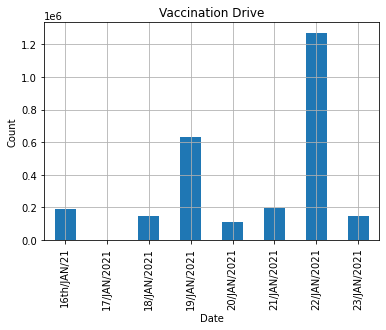

In [104]:
df.sum().plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Vaccination Drive')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#### TODO
Find a way to store the data in a pkl file and with every new addition of pdf file it gets updated